In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_users = pd.read_csv("./airbnb-recruiting-new-user-bookings/train_users_2.csv.zip")
test_users = pd.read_csv("./airbnb-recruiting-new-user-bookings/test_users.csv.zip")

In [3]:
# Concatenate train and test data for EDA
df_all = pd.concat([train_users,  test_users], ignore_index=True)
labels = df_all['country_destination'].values
df_all = df_all.drop(['country_destination'], axis=1)

#Filling nan
df_all = df_all.fillna(-1)
df_all.shape

(275547, 15)

In [4]:
import pandas as pd

s = pd.Series(labels)
country_counts = {'NDF': 0, 
                  'US': 1, 
                  'other': 2, 
                  'FR': 3,
                  'IT': 4,
                  'GB': 5,
                  'ES': 6, 'CA': 7, 'DE': 8, 'NL': 9, 'AU': 10, 'PT': 11}

country_mapping = {country: i for i, country in enumerate(country_counts.keys())}

labels = s.replace(country_mapping)
labels = labels.fillna(-1)
print(labels)


0         0.0
1         0.0
2         1.0
3         2.0
4         1.0
         ... 
275542   -1.0
275543   -1.0
275544   -1.0
275545   -1.0
275546   -1.0
Length: 275547, dtype: float64


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       275547 non-null  object 
 1   date_account_created     275547 non-null  object 
 2   timestamp_first_active   275547 non-null  int64  
 3   date_first_booking       275547 non-null  object 
 4   gender                   275547 non-null  object 
 5   age                      275547 non-null  float64
 6   signup_method            275547 non-null  object 
 7   signup_flow              275547 non-null  int64  
 8   language                 275547 non-null  object 
 9   affiliate_channel        275547 non-null  object 
 10  affiliate_provider       275547 non-null  object 
 11  first_affiliate_tracked  275547 non-null  object 
 12  signup_app               275547 non-null  object 
 13  first_device_type        275547 non-null  object 
 14  firs

In [6]:
# Split date_account_created column into year, month, day columns
df_all[['dac_year', 'dac_month', 'dac_day']] = df_all['date_account_created'].str.split('-', expand=True).astype(int)

# Drop date_account_created column
df_all = df_all.drop('date_account_created', axis=1)


In [7]:
df_all[['tfa_year', 'tfa_month', 'tfa_day', '', '', '']] = pd.DataFrame(df_all.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).tolist(), index=df_all.index)
df_all.drop('timestamp_first_active', axis=1, inplace=True)


In [8]:
age = df_all.age.values
df_all['age'] = np.where((age < 14) | (age > 100), -1, age)

In [9]:
# One hot Encoding
categorical_feats = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel',
             'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

df_all = pd.get_dummies(df_all, columns=categorical_feats)


In [10]:
df_all = df_all.drop(['date_first_booking'], axis=1)
df_all['country_destination'] = labels

In [11]:
df_all.shape

(275547, 164)

In [12]:
#df_all.to_csv('train.csv')
#df_all

## 模型參數 : 標準

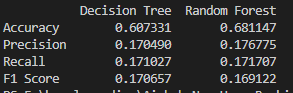